# DC-TSS Example with Music

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import os
import csv
from scipy import stats as st
from utils import *

import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets


import numpy as np
import matplotlib.pyplot as plt
import os
import torch.nn.functional as F
from torch.autograd import Variable
import math
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import distance
from TS_DEC import *
#from TS_DEC_Linear import *


from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from scipy.spatial.distance import cosine as cosine_distance
from typing import Optional, List
from scipy.io import arff

from scipy.signal import find_peaks, peak_prominences


import warnings
warnings.filterwarnings("ignore")

## Set Parameters

In [4]:
# Hyper parameters for Neural Network
epochs1 = 1200
epochs2 = 8000
lr=0.1
pre_lr = 1.5e-3
layers = [10,8,6]
strides = [3,3,3]
batch_size = 1500

# DC-TSS hyper-parameters
window_length = 150
overlap_percent = 0.1
n_clusters = 100
window_length2 = 100



## Read Dataset

In [5]:
#selected_songs = [2,140,30056,30058,85594,120308,120194,120112,120105]
time_series = np.loadtxt("./data/Music_Analysis.csv", delimiter=",")
labels = np.loadtxt("./data/Music_Analysis_labels.csv", delimiter=",")

ground_truth = np.where(labels[:-1] != labels[1:])[0]


## Subsequence TS

In [6]:
start = 0
subsequences = []
subsequence_labels = []

while start+window_length < len(time_series[0]):
    subsequence_labels.append(st.mode(labels[start:start+window_length])[0][0])    
    subsequence = time_series[:,start:start+window_length]
    start = start+window_length - int(overlap_percent*window_length)
    subsequences.append(subsequence)
    subsequences.append(np.roll(subsequence, (window_length)//2))

subsequences = np.asarray(subsequences)
subsequence_labels = np.asarray(subsequence_labels)
batch_size = subsequences.shape[0]

## Set Data_loader for Neural Network?

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


data_loader = get_dataloader(data=subsequences,
                          shuffle=False,
                          batch_size=batch_size,
                          num_workers=1,
                          data_transforms=None)
torch.cuda.empty_cache()
input_shape = subsequences.shape
#torch.cuda.memory_summary(device=None, abbreviated=False)



cuda


## Create DC-TSS model

In [17]:
deep_cluster_model = DEC(n_clusters = n_clusters, input_shape=input_shape,k_sizes=layers,strides=strides)
deep_cluster_model.to(device)


DEC(
  (AE): Autoencoder(
    (encoder): Sequential(
      (0): Conv1d(148, 148, kernel_size=(10,), stride=(3,))
      (1): LeakyReLU(negative_slope=0.1)
      (2): Conv1d(148, 148, kernel_size=(8,), stride=(3,))
      (3): LeakyReLU(negative_slope=0.1)
      (4): Conv1d(148, 148, kernel_size=(6,), stride=(3,))
    )
    (decoder): Sequential(
      (0): ConvTranspose1d(148, 148, kernel_size=(6,), stride=(3,))
      (1): LeakyReLU(negative_slope=0.1)
      (2): ConvTranspose1d(148, 148, kernel_size=(8,), stride=(3,))
      (3): LeakyReLU(negative_slope=0.1)
      (4): ConvTranspose1d(148, 148, kernel_size=(10,), stride=(3,))
      (5): LeakyReLU(negative_slope=0.1)
      (6): Upsample(size=150, mode=nearest)
    )
  )
  (clustlayer): clustering()
  (model): Sequential(
    (0): Sequential(
      (0): Conv1d(148, 148, kernel_size=(10,), stride=(3,))
      (1): LeakyReLU(negative_slope=0.1)
      (2): Conv1d(148, 148, kernel_size=(8,), stride=(3,))
      (3): LeakyReLU(negative_slope=0.1

## Phase 1: Initialize Latent Space Mapping with 1DCNN AE

In [18]:
pretraining(model=deep_cluster_model, dbgenerator=data_loader, batch_size=batch_size, epochs=epochs1,lr=pre_lr)


epoch 1,loss = 0.99856848
epoch 2,loss = 0.98862761
epoch 3,loss = 0.84622198
epoch 4,loss = 2.27430725
epoch 5,loss = 0.78212458
epoch 6,loss = 0.93264860
epoch 7,loss = 0.97215730
epoch 8,loss = 0.98046833
epoch 9,loss = 0.98072797
epoch 10,loss = 0.97553039
epoch 11,loss = 0.96054488
epoch 12,loss = 0.92162132
epoch 13,loss = 0.83048010
epoch 14,loss = 0.72806233
epoch 15,loss = 0.84559417
epoch 16,loss = 0.66275412
epoch 17,loss = 0.66570485
epoch 18,loss = 0.70607948
epoch 19,loss = 0.70078719
epoch 20,loss = 0.67654687
epoch 21,loss = 0.63138086
epoch 22,loss = 0.66056681
epoch 23,loss = 0.61519349
epoch 24,loss = 0.60204601
epoch 25,loss = 0.58236945
epoch 26,loss = 0.57371378
epoch 27,loss = 0.57701433
epoch 28,loss = 0.55229646
epoch 29,loss = 0.54501623
epoch 30,loss = 0.53664303
epoch 31,loss = 0.53128380
epoch 32,loss = 0.51873422
epoch 33,loss = 0.50794083
epoch 34,loss = 0.50241262
epoch 35,loss = 0.49472329
epoch 36,loss = 0.49104095
epoch 37,loss = 0.48309910
epoch 38,l

epoch 298,loss = 0.27391860
epoch 299,loss = 0.28279105
epoch 300,loss = 0.26835462
epoch 301,loss = 0.27859634
epoch 302,loss = 0.27130422
epoch 303,loss = 0.27209336
epoch 304,loss = 0.26961142
epoch 305,loss = 0.26950583
epoch 306,loss = 0.26856193
epoch 307,loss = 0.26750514
epoch 308,loss = 0.26627460
epoch 309,loss = 0.26596591
epoch 310,loss = 0.26487353
epoch 311,loss = 0.26384276
epoch 312,loss = 0.26430911
epoch 313,loss = 0.26224044
epoch 314,loss = 0.26245898
epoch 315,loss = 0.26201862
epoch 316,loss = 0.26041317
epoch 317,loss = 0.26143748
epoch 318,loss = 0.25987387
epoch 319,loss = 0.25944379
epoch 320,loss = 0.25965515
epoch 321,loss = 0.25841060
epoch 322,loss = 0.25864276
epoch 323,loss = 0.25778985
epoch 324,loss = 0.25763118
epoch 325,loss = 0.25721282
epoch 326,loss = 0.25669611
epoch 327,loss = 0.25653145
epoch 328,loss = 0.25605321
epoch 329,loss = 0.25562790
epoch 330,loss = 0.25547594
epoch 331,loss = 0.25494617
epoch 332,loss = 0.25479266
epoch 333,loss = 0.2

epoch 591,loss = 0.21389186
epoch 592,loss = 0.21113524
epoch 593,loss = 0.21145308
epoch 594,loss = 0.21156730
epoch 595,loss = 0.20922886
epoch 596,loss = 0.20863478
epoch 597,loss = 0.20976147
epoch 598,loss = 0.20842420
epoch 599,loss = 0.20766124
epoch 600,loss = 0.20858483
epoch 601,loss = 0.20758589
epoch 602,loss = 0.20676191
epoch 603,loss = 0.20764531
epoch 604,loss = 0.20719871
epoch 605,loss = 0.20629521
epoch 606,loss = 0.20691662
epoch 607,loss = 0.20748132
epoch 608,loss = 0.20761040
epoch 609,loss = 0.21034199
epoch 610,loss = 0.21244201
epoch 611,loss = 0.21450004
epoch 612,loss = 0.20880878
epoch 613,loss = 0.20750062
epoch 614,loss = 0.20723516
epoch 615,loss = 0.20796350
epoch 616,loss = 0.20858958
epoch 617,loss = 0.20520051
epoch 618,loss = 0.20729677
epoch 619,loss = 0.20755184
epoch 620,loss = 0.20450132
epoch 621,loss = 0.20680501
epoch 622,loss = 0.20546964
epoch 623,loss = 0.20515324
epoch 624,loss = 0.20515089
epoch 625,loss = 0.20401034
epoch 626,loss = 0.2

epoch 884,loss = 0.17145126
epoch 885,loss = 0.16671109
epoch 886,loss = 0.16845241
epoch 887,loss = 0.16778740
epoch 888,loss = 0.16563547
epoch 889,loss = 0.16762684
epoch 890,loss = 0.16501777
epoch 891,loss = 0.16442260
epoch 892,loss = 0.16587955
epoch 893,loss = 0.16390857
epoch 894,loss = 0.16368090
epoch 895,loss = 0.16450985
epoch 896,loss = 0.16315918
epoch 897,loss = 0.16325183
epoch 898,loss = 0.16330940
epoch 899,loss = 0.16234532
epoch 900,loss = 0.16262358
epoch 901,loss = 0.16207036
epoch 902,loss = 0.16185881
epoch 903,loss = 0.16165356
epoch 904,loss = 0.16111392
epoch 905,loss = 0.16117381
epoch 906,loss = 0.16093023
epoch 907,loss = 0.16073024
epoch 908,loss = 0.16058700
epoch 909,loss = 0.16041748
epoch 910,loss = 0.16062261
epoch 911,loss = 0.16093646
epoch 912,loss = 0.16202110
epoch 913,loss = 0.16398628
epoch 914,loss = 0.16813642
epoch 915,loss = 0.16894318
epoch 916,loss = 0.16497310
epoch 917,loss = 0.16094117
epoch 918,loss = 0.16484186
epoch 919,loss = 0.1

epoch 1171,loss = 0.14684601
epoch 1172,loss = 0.14401801
epoch 1173,loss = 0.14101261
epoch 1174,loss = 0.14339603
epoch 1175,loss = 0.14405738
epoch 1176,loss = 0.14036416
epoch 1177,loss = 0.14232227
epoch 1178,loss = 0.14209901
epoch 1179,loss = 0.14015977
epoch 1180,loss = 0.14137959
epoch 1181,loss = 0.13964215
epoch 1182,loss = 0.14017142
epoch 1183,loss = 0.13946940
epoch 1184,loss = 0.13967852
epoch 1185,loss = 0.13967156
epoch 1186,loss = 0.13874720
epoch 1187,loss = 0.13959697
epoch 1188,loss = 0.13810676
epoch 1189,loss = 0.13878429
epoch 1190,loss = 0.13812885
epoch 1191,loss = 0.13833153
epoch 1192,loss = 0.13883780
epoch 1193,loss = 0.13877659
epoch 1194,loss = 0.14012556
epoch 1195,loss = 0.14154588
epoch 1196,loss = 0.14315306
epoch 1197,loss = 0.14178586
epoch 1198,loss = 0.14004904
epoch 1199,loss = 0.14249319
epoch 1200,loss = 0.14337561


In [19]:
torch.save(deep_cluster_model.state_dict(), './Music_pretrain.pth')

In [8]:
deep_cluster_model = DEC(n_clusters = n_clusters, input_shape=input_shape,k_sizes=layers,strides=strides)
deep_cluster_model.load_state_dict(torch.load('./Music_pretrain.pth'))
deep_cluster_model.to(device)

DEC(
  (AE): Autoencoder(
    (encoder): Sequential(
      (0): Conv1d(148, 148, kernel_size=(10,), stride=(3,))
      (1): LeakyReLU(negative_slope=0.1)
      (2): Conv1d(148, 148, kernel_size=(8,), stride=(3,))
      (3): LeakyReLU(negative_slope=0.1)
      (4): Conv1d(148, 148, kernel_size=(6,), stride=(3,))
    )
    (decoder): Sequential(
      (0): ConvTranspose1d(148, 148, kernel_size=(6,), stride=(3,))
      (1): LeakyReLU(negative_slope=0.1)
      (2): ConvTranspose1d(148, 148, kernel_size=(8,), stride=(3,))
      (3): LeakyReLU(negative_slope=0.1)
      (4): ConvTranspose1d(148, 148, kernel_size=(10,), stride=(3,))
      (5): LeakyReLU(negative_slope=0.1)
      (6): Upsample(size=150, mode=nearest)
    )
  )
  (clustlayer): clustering()
  (model): Sequential(
    (0): Sequential(
      (0): Conv1d(148, 148, kernel_size=(10,), stride=(3,))
      (1): LeakyReLU(negative_slope=0.1)
      (2): Conv1d(148, 148, kernel_size=(8,), stride=(3,))
      (3): LeakyReLU(negative_slope=0.1

## Phase 2: Refine Latent Space and Find Clusters

In [9]:
# Refine on nonagumented subsequences (no np.roll())
start = 0
subsequences = []
subsequence_labels = []

while start+window_length < len(time_series[0]):
    subsequence_labels.append(st.mode(labels[start:start+window_length])[0][0])    
    subsequence = time_series[:,start:start+window_length]
    start = start+window_length - int(overlap_percent*window_length)
    subsequences.append(subsequence)
    

subsequences = np.asarray(subsequences)
subsequence_labels = np.asarray(subsequence_labels)
batch_size = subsequences.shape[0]
input_shape = subsequences.shape

data_loader = get_dataloader(data=subsequences,
                              shuffle=False,
                              batch_size=batch_size,
                              num_workers=1,
                              data_transforms=None)

# refine mapping
cluster_assignments = refine_clusters(n_clusters, data_loader, deep_cluster_model, device, epochs2, batch_size, lr, 0.0, 1)


Initializing cluster centers with k-means. number of clusters 100
torch.Size([2295, 148, 150])
1.0
Epoch 200:   loss= 0.34313  cluster difference= 1.0
Epoch 400:   loss= 0.36511  cluster difference= 0.06753812636165578
Epoch 600:   loss= 0.37796  cluster difference= 0.04749455337690632
Epoch 800:   loss= 0.38657  cluster difference= 0.06710239651416122
Epoch 1000:   loss= 0.39305  cluster difference= 0.0766884531590414
Epoch 1200:   loss= 0.39825  cluster difference= 0.09498910675381264
Epoch 1400:   loss= 0.40268  cluster difference= 0.07581699346405228
Epoch 1600:   loss= 0.4066  cluster difference= 0.07930283224400872
Epoch 1800:   loss= 0.41009  cluster difference= 0.05228758169934641
Epoch 2000:   loss= 0.41324  cluster difference= 0.12505446623093683
Epoch 2200:   loss= 0.41604  cluster difference= 0.07886710239651416
Epoch 2400:   loss= 0.4185  cluster difference= 0.11372549019607843
Epoch 2600:   loss= 0.42064  cluster difference= 0.0915032679738562
Epoch 2800:   loss= 0.42256 

In [10]:
torch.save(deep_cluster_model.state_dict(), './Music_refined.pth')

## Visualize Latent Space with t-SNE

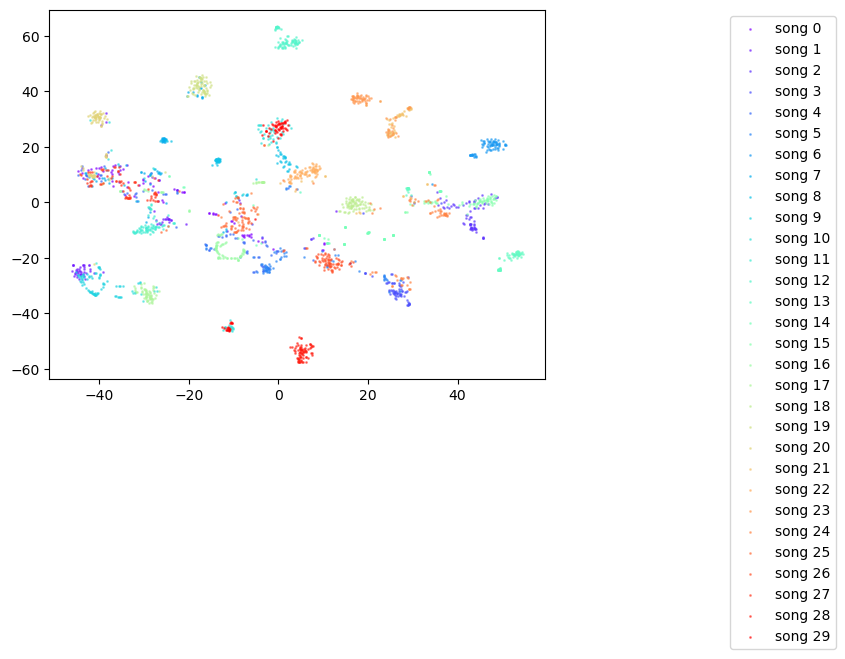

In [25]:
plt.style.use('default')
clustering_output = []
for ts in data_loader:
    recon = deep_cluster_model.AE.encode((ts.float().to(device)))
    clustering_output.append( recon.cpu().detach().numpy() ) 
    

clustering_output = [item for sublist in clustering_output for item in sublist]

clustering_output = np.asarray(clustering_output)
clustering_output_f = []
for i,co in enumerate(clustering_output):
    clustering_output[i].flatten()
    clustering_output_f.append(clustering_output[i].flatten())
clustering_output_f = np.asarray(clustering_output_f)

activities = []
activities.append(labels[0])
for l in labels:
    if l != activities[-1]:
        activities.append(int(l))


activity_names = []
for k in range(30):
    activity_names.append('song {}'.format(k))

X_embedded = TSNE(n_components=2).fit_transform(clustering_output_f)

cmap = plt.get_cmap('rainbow')

l = np.unique(labels)
slicedCM = cmap(np.linspace(0, 1, len(l))) 



for m,la in enumerate(l): 
    ind = np.where(subsequence_labels==la)
    plt.scatter(X_embedded[ind,0],X_embedded[ind,1],color=slicedCM[m], label=activity_names[int(la)], alpha=0.5, s=1)

plt.legend(loc=1, bbox_to_anchor=(1.1, 0., 0.5, 1.0))

## Remove Duplicate Cluster Labels and Set Labels in Sequential Order

In [26]:
while ( (not all(l[i] == l[i+1] -1 for i in range(len(l) - 1))) or (l[0] != 0) ):
    for assignment in range(np.max(cluster_assignments)+1):
        if assignment not in cluster_assignments:
            indx = np.where(cluster_assignments > assignment)
            cluster_assignments[indx] = cluster_assignments[indx]-1
    l = np.unique(cluster_assignments)

## Phase 3: Sldiing Window on Cluster Labels

In [27]:
window_length2 = window_length2
similarities = get_label_score(cluster_assignments, window_length2)


## Normalize and Smooth Sliding Window Distance

In [28]:
data = (similarities - np.min(similarities)) / (np.max(similarities) - np.min(similarities))
data = smooth(np.blackman(40), data)

In [29]:
peaks, peak_data = find_peaks(data, height=0.1,distance=window_length2//2,prominence=0.05)
real_peaks = peaks+window_length2//2
predictions = get_changepoints(real_peaks, window_length, overlap_percent)


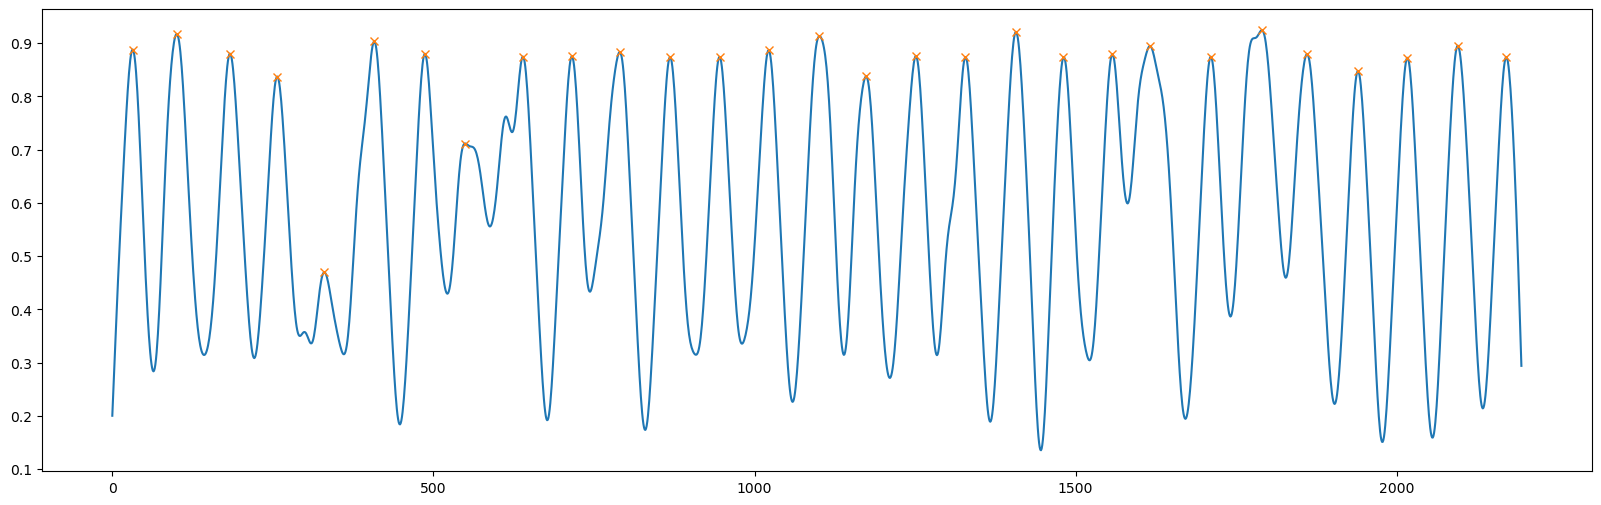

Space: Encoded Hidden Space
Clusters = 100


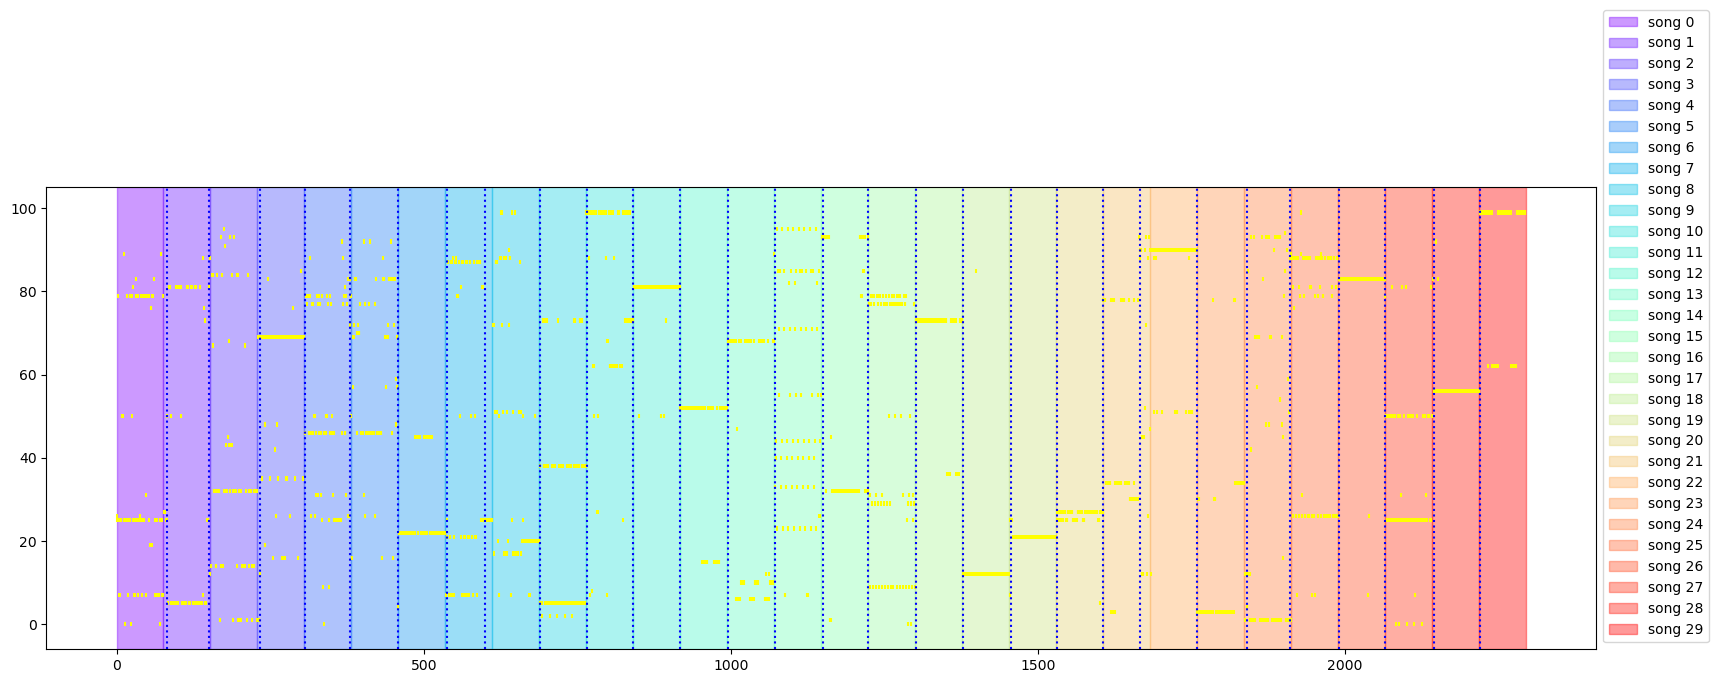

covering score: 0.937856549641456
margin: 2400
f_measure score: (1.0, 1.0, 1.0)


In [30]:
plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')
cmap = plt.get_cmap('rainbow')

l = np.unique(labels)


slicedCM = cmap(np.linspace(0, 1, len(activity_names))) 


plt.plot(data)
plt.plot(peaks, data[peaks], "x")
plt.show()

positions = np.arange(len(cluster_assignments))[:,np.newaxis]

plt.eventplot(positions, lineoffsets=cluster_assignments, color = [(1.0,1.0,0.0)])

for vline in real_peaks:
    plt.axvline(x = vline, color = 'b', linestyle=':', mfc='b')

start = 0
subsequence_ground_truth = np.where(subsequence_labels[:-1] != subsequence_labels[1:])[0]
print("Space: Encoded Hidden Space\nClusters = {}".format(n_clusters))
for i, activity in enumerate(activities):
    if i == len(activities):
        continue
    if i == len(activities)-1:
        end = len(subsequence_labels)
    else:
        end = subsequence_ground_truth[i]

    plt.axvspan(start, end, alpha=0.4, color=slicedCM[int(activity)], label=activity_names[int(activity)])
    plt.legend(loc=3, bbox_to_anchor=(1, 0, 0, 1.0))
    start = end
plt.show()

print('covering score:',covering(ground_truth, predictions, len(labels)))
margin = 2400
print('margin:',margin)
print('f_measure score:',f_measure(ground_truth, predictions, margin=margin, alpha=0.5, return_PR=True))